In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from  matplotlib import cm

В качестве веса используется watched ratio - число от 0 до 1, показывающее то, какая часть от хронометража фильма в конкретном User-Item взаимодействии былапросмотрена, где ~0 — пользователь практически не посмотрел фильм, 1 — пользователь посмотрел фильм целиком

In [2]:
interactions = pd.read_csv('/home/ml/softezza_ml/data/interactions.csv')

interactions.head()

,user_id,item_id,timestamp,weight
0,881201,tt1979376,2019-10-06T09:28:00.000000,0.011500
1,882501,tt0765429,2019-10-25T21:31:13.000000,0.000000
2,882501,tt4332232,2019-10-13T20:07:31.000000,0.003199
3,882501,tt6533240,2019-10-10T13:48:45.000000,0.383673
4,882501,tt9243946,2019-10-12T11:34:13.000000,0.003005


### Распространение количества просмотров на пользователя/фильм

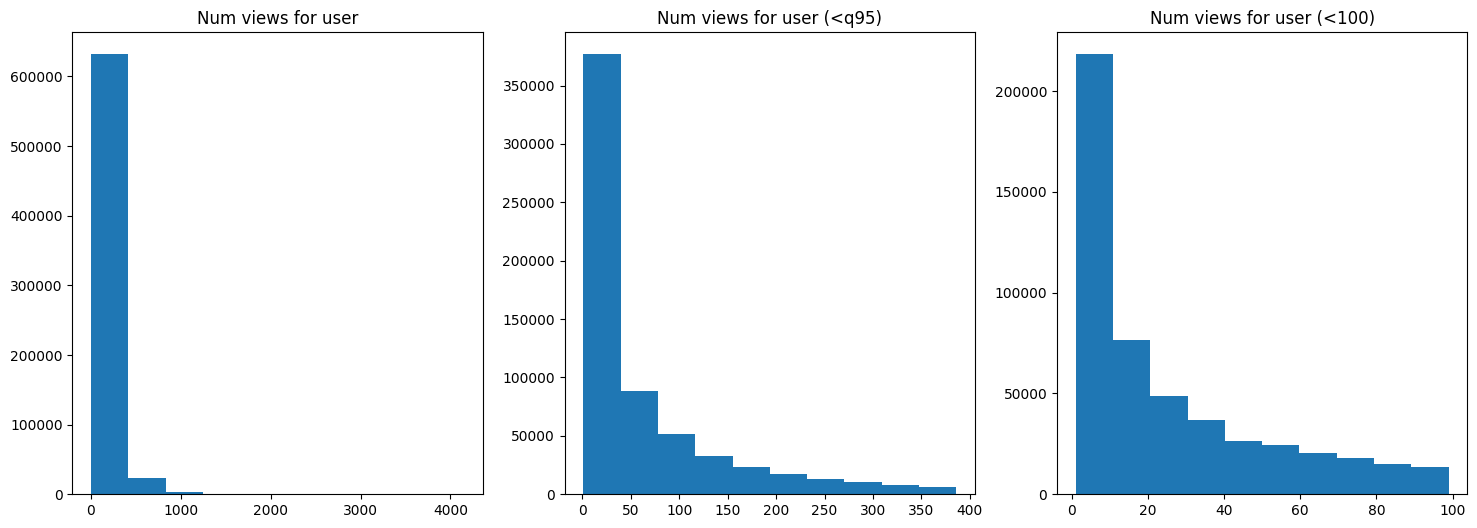

In [3]:
user_counts = interactions.value_counts('user_id')
plt.figure(figsize=(18, 6))

plt.subplot(131).set_title('Num views for user')
plt.subplot(131).hist(interactions.value_counts('user_id'))
plt.subplot(132).set_title('Num views for user (<q95)')
plt.subplot(132).hist(user_counts[user_counts.values < user_counts.quantile(0.95)])
plt.subplot(133).set_title('Num views for user (<100)')
plt.subplot(133).hist(user_counts[user_counts.values < 100]);

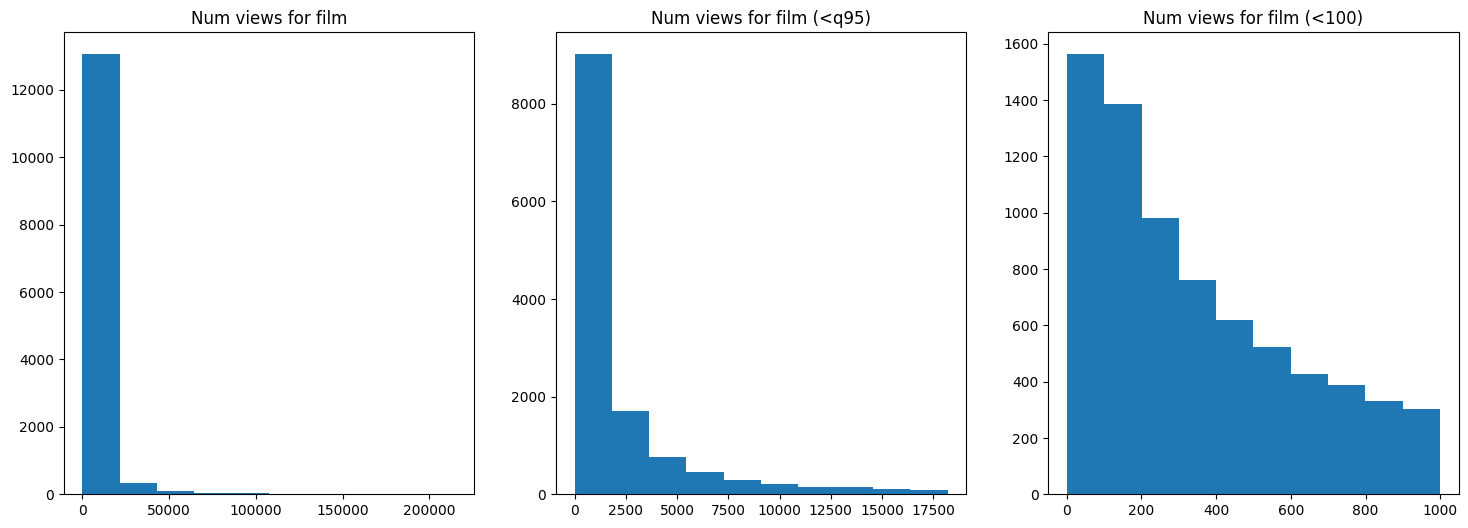

In [4]:
item_counts = interactions.value_counts('item_id')
plt.figure(figsize=(18, 6))

plt.subplot(131).set_title('Num views for film')
plt.subplot(131).hist(item_counts)
plt.subplot(132).set_title('Num views for film (<q95)')
plt.subplot(132).hist(item_counts[item_counts.values < item_counts.quantile(0.95)])
plt.subplot(133).set_title('Num views for film (<100)')
plt.subplot(133).hist(item_counts[item_counts.values < 1000]);

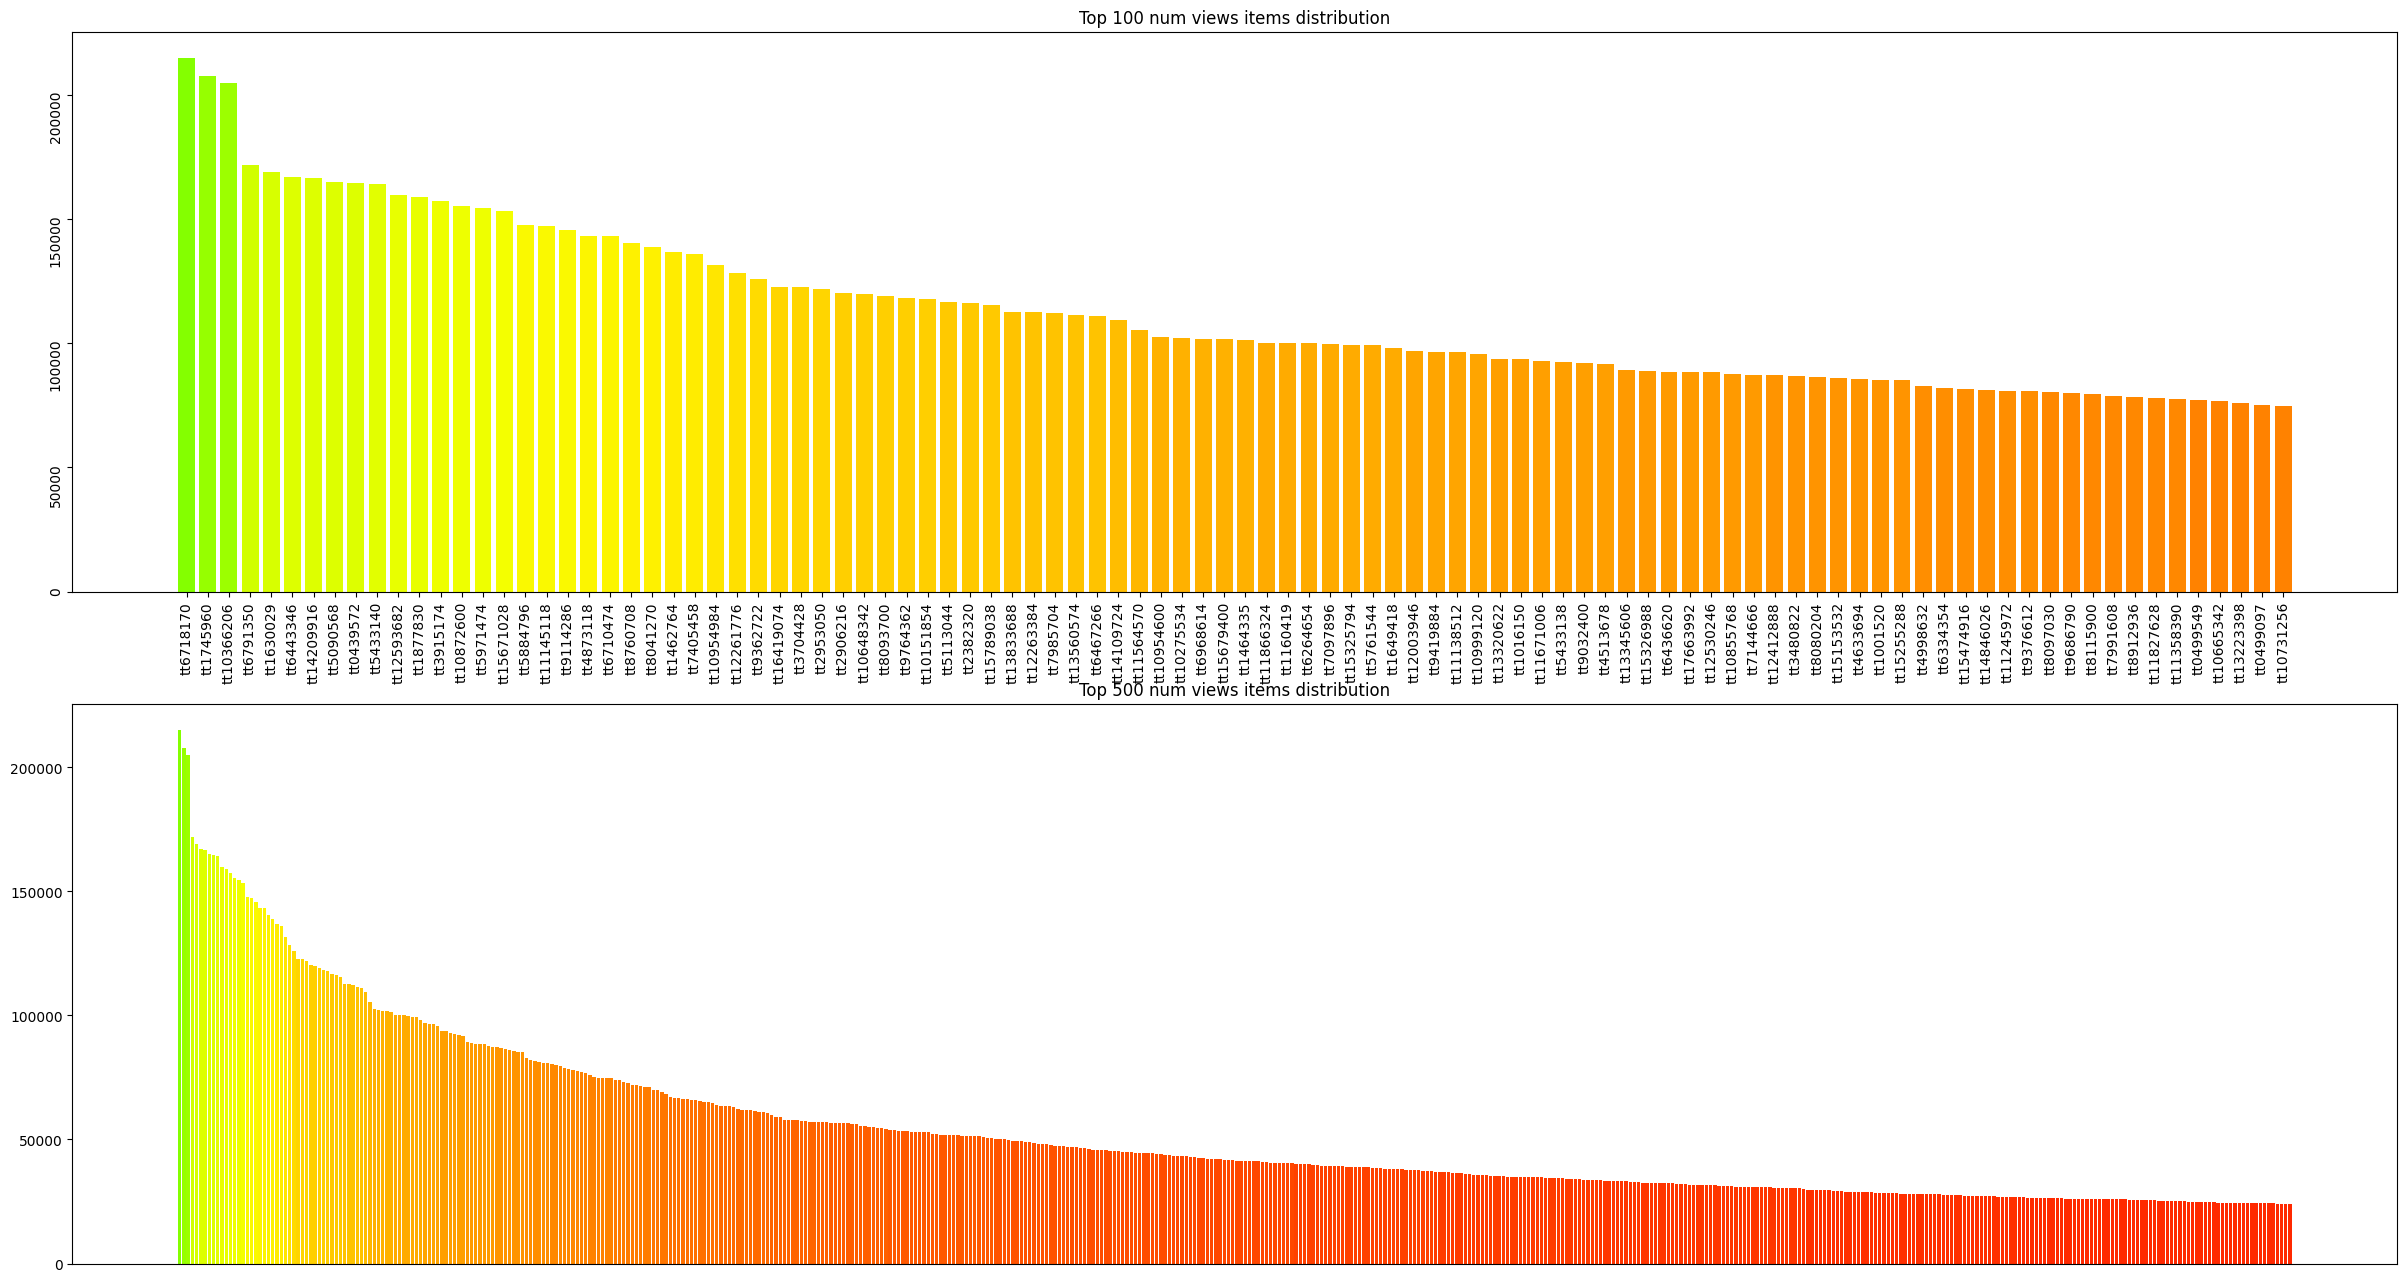

In [30]:
item_counts_100 = item_counts.head(100)
item_counts_500 = item_counts.head(500)

plt.figure(figsize=(30, 16))

plt.subplot(211).set_title('Top 100 num views items distribution')
plt.subplot(211).bar(item_counts_100.index, item_counts_100.values, color=cm.hsv(item_counts_100.values/max(item_counts_100)*0.25))
plt.subplot(211).tick_params(labelrotation=90)
plt.subplot(212).set_title('Top 500 num views items distribution')
plt.subplot(212).bar(item_counts_500.index, item_counts_500.values, color=cm.hsv(item_counts_500.values/max(item_counts_500)*0.25))
plt.subplot(212).set_xticks([]);

In [32]:
interactions['week'] = pd.to_datetime(interactions['timestamp']).dt.isocalendar().week
by_week = interactions.sort_values(by = ['week', 'item_id']).set_index(['week', 'item_id'])
by_week = by_week.pivot_table(index='item_id', columns = 'week', values = 'user_id', aggfunc = 'count', fill_value = 0)
by_week['max_by_weeks'] = by_week[by_week.columns].max(axis = 1)
top_100_movies = by_week.sort_values(by = 'max_by_weeks', ascending = False).head(100)
week_progress = by_week.drop(['max_by_weeks'], axis = 1).sum().to_frame()

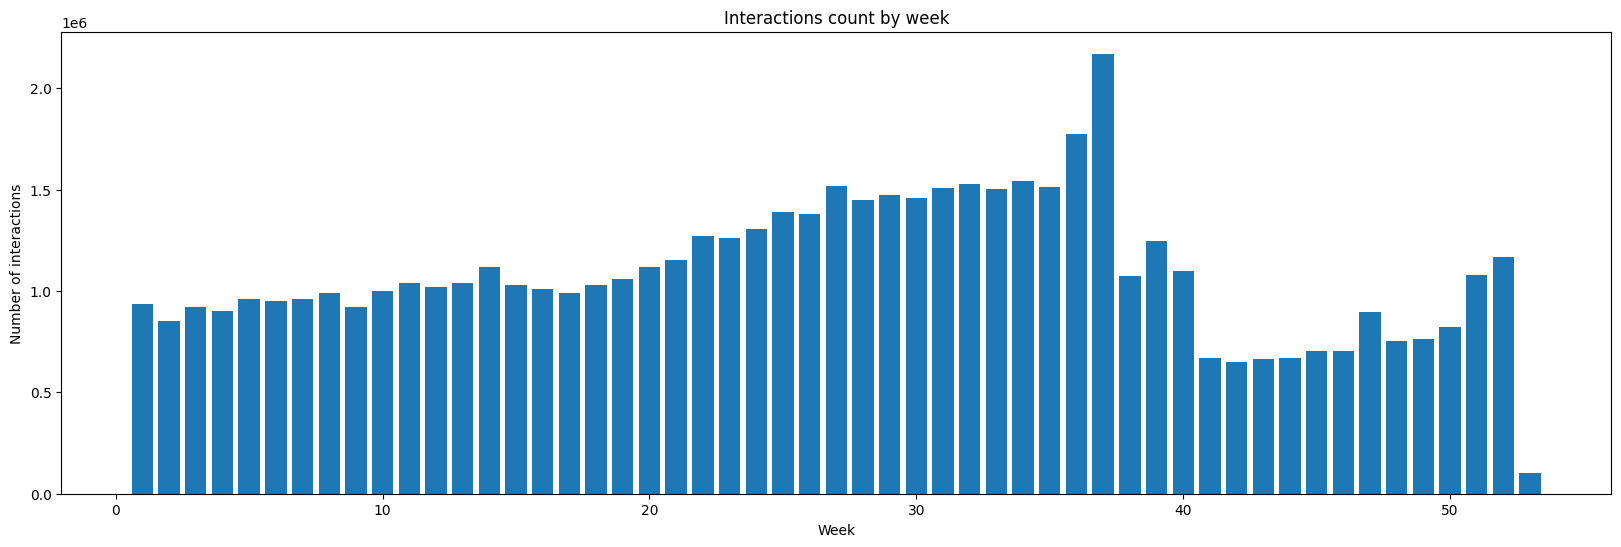

In [39]:
plt.figure(figsize=(20, 6))

plt.bar(week_progress.index, week_progress[0])
plt.title('Interactions count by week')
plt.ylabel('Number of interactions')
plt.xlabel('Week');

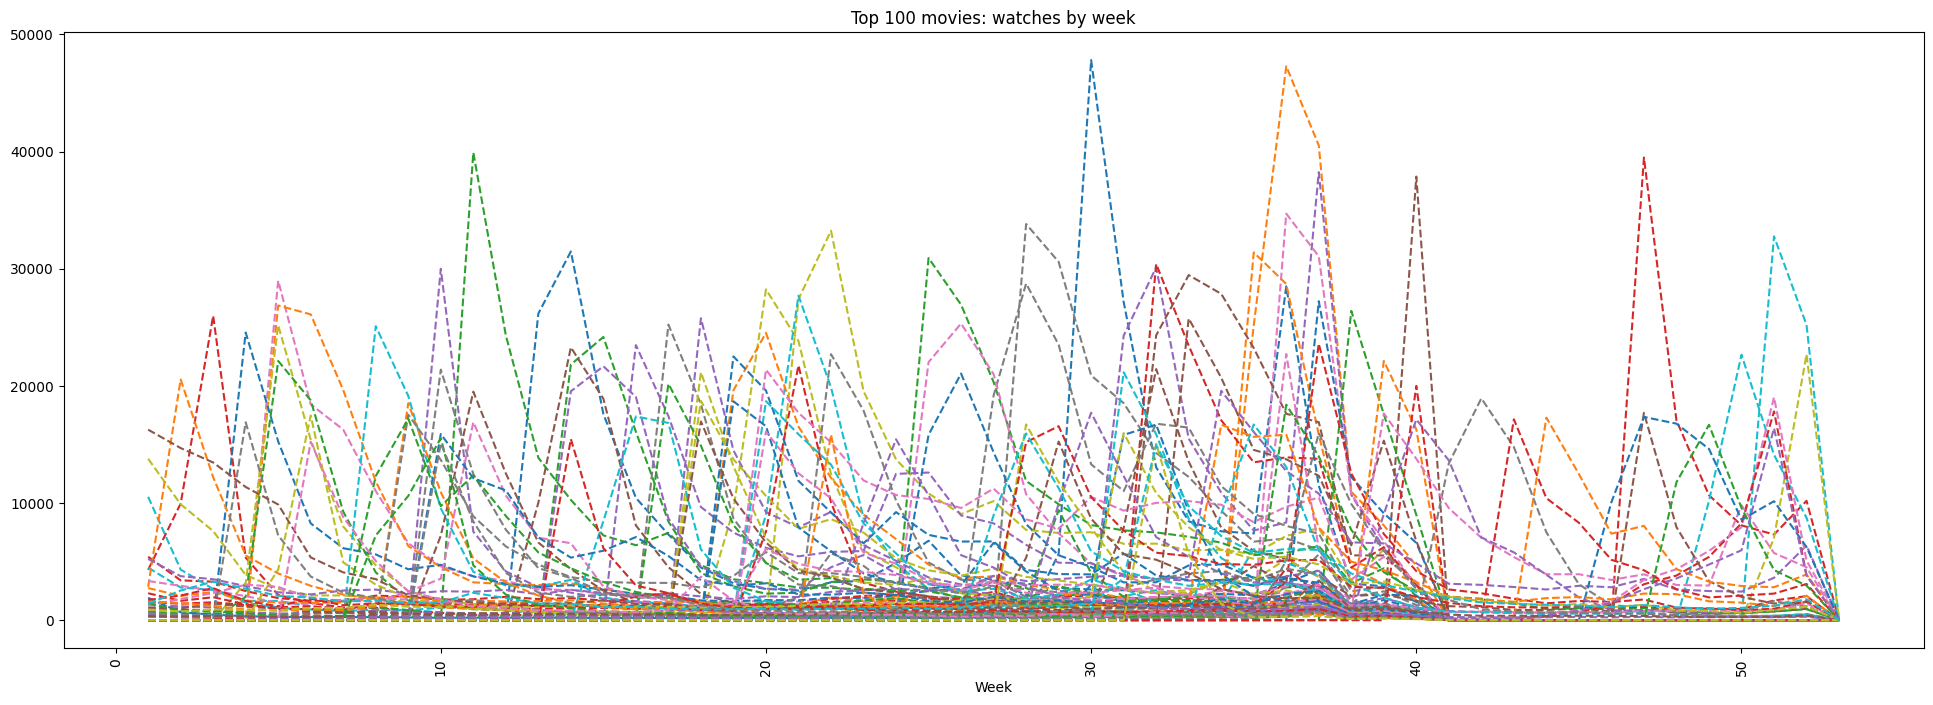

In [58]:
plt.figure(figsize=(24, 8))
_top_100_movies = top_100_movies.drop(columns='max_by_weeks').transpose()

plt.plot(_top_100_movies.index, _top_100_movies.values, linestyle='dashed')
plt.xlabel('Week')
plt.xticks(rotation=90)
plt.title('Top 100 movies: watches by week');